In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab4.ipynb")

In [2]:
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm.sklearn import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import (
    RandomizedSearchCV,
    cross_validate,
    train_test_split,
)
from sklearn.feature_selection import RFECV
import shap
import eli5
import pandas as pd
import altair as alt
import numpy as np
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

C:\Users\ROG ZEPHYRUS\miniconda3\envs\573\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


RendererRegistry.enable('mimetype')

# Lab 4: Putting it all together in a mini project

**This lab is an optional group lab.** You can choose to work alone of in a group of up to four students. You are in charge of how you want to work and who you want to work with. Maybe you really want to go through all the steps of the ML process yourself or maybe you want to practice your collaboration skills, it is up to you! Just remember to indicate who your group members are (if any) when you submit on Gradescope. If you choose to work in a group, you only need to use one of your GitHub repos.

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## Submission instructions
rubric={mechanics}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li><a href="https://ubc-mds.github.io/resources_pages/general_lab_instructions/">
      Follow the general lab instructions.</a></li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Make at least three commits.</li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab and upload it to Gradescope.</li>
    <ul>
      <li>Before submitting, make sure you restart the kernel and rerun all cells.</li>
    </ul>
  <li>Also upload a <code>.pdf</code> export of the notebook to facilitate grading of manual questions (preferably WebPDF, you can select two files when uploading to gradescope)</li>
  <li>Don't change any variable names that are given to you, don't move cells around, and don't include any code to install packages in the notebook.</li>
  <li>The data you download for this lab <b>SHOULD NOT BE PUSHED TO YOUR REPOSITORY</b> (there is also a <code>.gitignore</code> in the repo to prevent this).</li>
  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/MDS-2020-21/DSCI_531_labX_yourcwl.</li>
    </ul>
  </li>
</ul>
</div>

_Points:_ 2

https://github.com/UBC-MDS/lab4_bnb_morris_eric

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this lab you will be working on an open-ended mini-project, where you will put all the different things you have learned so far in 571 and 573 together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. Since this mini-project is open-ended there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you instead do a bunch of sane things and you have clearly motivated your choices, but still get lower model performance than your friend, don't sweat it.


#### A final note
Finally, the style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "several hours" but not "many hours" is a good guideline for a high quality submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
rubric={reasoning}

In this mini project, you will pick one of the following problems: 

1. A classification problem of predicting whether a credit card client will default or not. For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

OR 

2. A regression problem of predicting `reviews_per_month`, as a proxy for the popularity of the listing with [New York City Airbnb listings from 2019 dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 
3. Carry out any preliminary preprocessing, if needed (e.g., changing feature names, handling of NaN values etc.)
    
</div>

_Points:_ 3

1. The dataset shows the Airbnb listings in New York City in 2019 with the goal of predicting the number of reviews per month `reviews_per_month` which serves as a proxy of the popularity of the listing. We work with a combination of categorical and numeric features such as the name of the listing, neighbourhood, price, and number of reviews to name a few. Given that the target is numeric, the task will be a regression problem. Being able to accurately predict the number of reviews per month can help hosts identify areas of improvement or perhaps identify regions in the city where there are more popular listings.

In [3]:
bnb_df = pd.read_csv("data/AB_NYC_2019.csv")
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We will drop the columns `name`, `id`, `host_id`, `host_name` and `last_review` since we believe those will not be useful in building the model. In particular, we drop `name` because it would take too long to perform cross validation and fit the model if we use `CountVectorizer`, and given that the hosts can choose their own description for their listing, it is likely that they will try to make it as appealing, so we believe it would not benefit much if we extracted sentiment ratings out of it either. There are also missing values in the target column `reviews_per_month`, so we will also drop the rows where the target is missing.

In [4]:
bnb_df = bnb_df.drop(columns=["name", "id", "host_id", "host_name", "last_review"])
bnb_df = bnb_df.dropna(subset=["reviews_per_month"])
bnb_df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129


In [5]:
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38843 entries, 0 to 48852
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             38843 non-null  object 
 1   neighbourhood                   38843 non-null  object 
 2   latitude                        38843 non-null  float64
 3   longitude                       38843 non-null  float64
 4   room_type                       38843 non-null  object 
 5   price                           38843 non-null  int64  
 6   minimum_nights                  38843 non-null  int64  
 7   number_of_reviews               38843 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  38843 non-null  int64  
 10  availability_365                38843 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 3.6+ MB


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 2. Data splitting <a name="2"></a>
rubric={reasoning}

**Your tasks:**

1. Split the data into train and test portions.

> Make the decision on the `test_size` based on the capacity of your laptop. 
    
</div>

_Points:_ 1

In [6]:
train_df, test_df = train_test_split(bnb_df, test_size=0.6, random_state=573)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 3. EDA <a name="3"></a>
rubric={viz,reasoning}
    
Perform exploratory data analysis on the train set.

**Your tasks:**

1. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
2. Summarize your initial observations about the data. 
3. Pick appropriate metric/metrics for assessment. 
    
</div>

_Points:_ 6

In [7]:
train_df.describe(include="all")

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,15537,15537,15537.000000,15537.000000,15537,15537.000000,15537.000000,15537.000000,15537.000000,15537.000000,15537.000000
unique,5,203,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN
freq,6798,1271,NaN,NaN,8108,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,40.728591,-73.951471,NaN,142.613632,5.831242,29.530669,1.376337,5.088949,115.234215
std,NaN,NaN,0.054980,0.046506,NaN,204.936546,16.574092,48.213649,1.714032,26.084792,129.629791
min,NaN,NaN,40.508680,-74.244420,NaN,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,NaN,NaN,40.689070,-73.982990,NaN,69.000000,1.000000,3.000000,0.200000,1.000000,0.000000
50%,NaN,NaN,40.721660,-73.955090,NaN,101.000000,2.000000,10.000000,0.730000,1.000000,57.000000
75%,NaN,NaN,40.763450,-73.935630,NaN,170.000000,4.000000,33.000000,2.020000,2.000000,231.000000


From `df.describe()`, we can see the counts of each feature (no missing values), the top unique features for categorical features, and the distribution of numeric features. In particular, it should be noted that there are many different values for `neighourhood`, whereas for `neighbourhood_group` and `room_type` there are only a few different values.

In [8]:
train_df.corr('spearman').style.background_gradient()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.040003,0.116224,0.012909,-0.018017,-0.026249,-0.017908,-0.028150
longitude,0.040003,1.000000,-0.421945,-0.116255,0.074708,0.117891,0.099812,0.084432
price,0.116224,-0.421945,1.000000,0.112123,-0.012634,-0.018155,-0.168354,0.068478
minimum_nights,0.012909,-0.116255,0.112123,1.000000,-0.153568,-0.277524,0.001948,0.030722
number_of_reviews,-0.018017,0.074708,-0.012634,-0.153568,1.000000,0.699079,0.081178,0.293827
reviews_per_month,-0.026249,0.117891,-0.018155,-0.277524,0.699079,1.000000,0.147340,0.390578
calculated_host_listings_count,-0.017908,0.099812,-0.168354,0.001948,0.081178,0.147340,1.000000,0.377589
availability_365,-0.028150,0.084432,0.068478,0.030722,0.293827,0.390578,0.377589,1.000000


Looking at the correlation matrix, we can see there is a positive correlation between `number_of_reviews` and `reviews_per_month`. Aside from that, however, there does not appear to be other significant positive or negative correlations.

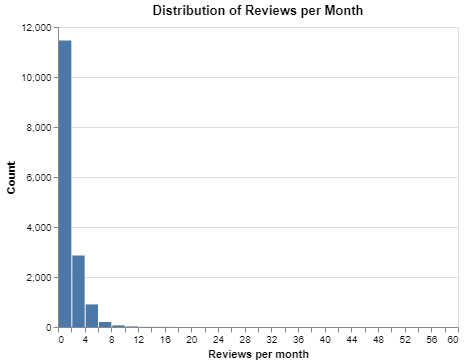

In [9]:
target_dist = alt.Chart(
    train_df,
    title = "Distribution of Reviews per Month"
).mark_bar().encode(
    x = alt.X("reviews_per_month", bin=alt.Bin(maxbins=30), title="Reviews per month"),
    y = alt.Y("count()", title="Count")
)
target_dist

We can see that the distribution of the target `reviews_per_month` is highly right-skewed. Most values are between 0-2, meaning that most Airbnbs listings do not have many customers each month.

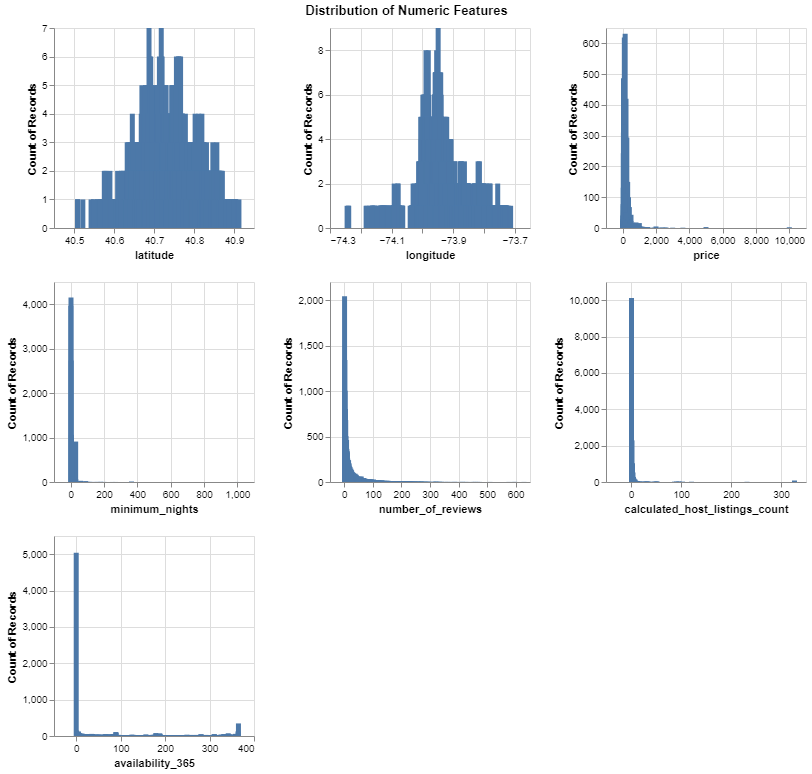

In [10]:
numeric_feats = train_df.select_dtypes(include="number").columns.tolist()
numeric_feats.remove("reviews_per_month")
numeric_feats_bar_chart = alt.Chart(train_df).mark_bar().encode(
    x = alt.X(alt.repeat(), type="quantitative"),
    y = "count()"
).properties(
    width=200,
    height=200
).repeat(
    numeric_feats,
    columns=3
)
numeric_feats_bar_chart.properties(title = alt.TitleParams(text="Distribution of Numeric Features", anchor="middle"))

We can see that most numeric features are right-skewed, as with `price`, `minimum_nights`, `number_of_reviews`, and `calculated_host_listings_count`.

In [11]:
scoring_metric = "r2"

The metric we choose for assessment is $R^2$ score because we want to maximize the accuracy of our predictions. We chose not to use MAPE or RMSE because the values for `reviews_per_month` are all very small (e.g. a MAPE of 10% would not make sense if the predicted value is 1 review per month, as that would suggest that the value is somewhere between 1.1 and 0.9 reviews per month, which also does not really make sense).

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 4. Feature engineering (Challenging)
rubric={reasoning}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing.
    
</div>

_Points:_ 0.5

Given that the floats for latitude and longitude does not really make much sense in the context of highlighting the region in NYC, we chose to perform feature engineering on those two features by binning them using `KBinsDiscretizer` which allows us to split the values for latitude and longitude into bins which can represent different regions of the city.

In [12]:
discretization_features = ["latitude", "longitude"]

discretization_transformer = make_pipeline(
    KBinsDiscretizer(n_bins=20, encode="onehot")
)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 5. Preprocessing and transformations <a name="5"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 
    
</div>

_Points:_ 4

Since there are no missing values anywhere, we will not need to impute anything. We will perform scaling on the numeric features one hot encoding on the categorical features. We will also bin the features `latitude` and `longitude` and create separate features for each bin.

In [13]:
numeric_features = ["price", 
                    "minimum_nights", 
                    "number_of_reviews", 
                    "calculated_host_listings_count",
                    "availability_365"]

categorical_features = ["neighbourhood", 
                        "room_type", 
                        "neighbourhood_group"]

target_column = "reviews_per_month"


numeric_transformer = make_pipeline(StandardScaler())

categorical_transformer = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse=False)
)

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (discretization_transformer, discretization_features),
    (categorical_transformer, categorical_features)
)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['price', 'minimum_nights',
                                  'number_of_reviews',
                                  'calculated_host_listings_count',
                                  'availability_365']),
                                ('pipeline-2',
                                 Pipeline(steps=[('kbinsdiscretizer',
                                                  KBinsDiscretizer(n_bins=20))]),
                                 ['latitude', 'longitude']),
                                ('pipeline-3',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['neighbourhood', 'room_type',
                                  'neighbourhood_group'])])

In [14]:
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]

X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 6. Baseline model <a name="6"></a>
rubric={accuracy}

**Your tasks:**
1. Train a baseline model for your task and report its performance.
    
</div>

_Points:_ 2

In [15]:
# Function from lecture notes
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

results = pd.DataFrame()

In [16]:
dummy = make_pipeline(preprocessor, DummyRegressor())

results["Dummy"] = pd.DataFrame(mean_std_cross_val_scores(dummy, X_train, y_train, return_train_score=True))
results

,Dummy
fit_time,0.039 (+/- 0.004)
score_time,0.015 (+/- 0.002)
test_score,-0.000 (+/- 0.000)
train_score,0.000 (+/- 0.000)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 7. Linear models <a name="7"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the regularization hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.
    
</div>

_Points:_ 8

Using the default values of alpha for Ridge, we got a cross validation score of 0.333 with standard deviation of 0.041. After performing L2-regularization on the linear model using Ridge, we got a cross validation score of 0.337 with standard deviation of 0.042 with alpha=10. This cross validation $R^2$ score is not very good given that it is rather low and overall the score did not improve by much even with regularization.

In [17]:
pipe_ridge = make_pipeline(preprocessor, Ridge())
results["Ridge"] = pd.DataFrame(mean_std_cross_val_scores(pipe_ridge, X_train, y_train, return_train_score=True))

In [18]:
alphas = 10.0 ** np.arange(-6, 6, 1)
pipe_ridgecv = make_pipeline(preprocessor, RidgeCV(alphas=alphas))

results["Ridge Tuned"] = pd.DataFrame(mean_std_cross_val_scores(pipe_ridgecv, X_train, y_train, return_train_score=True))
results

,Dummy,Ridge,Ridge Tuned
fit_time,0.039 (+/- 0.004),0.090 (+/- 0.013),0.441 (+/- 0.028)
score_time,0.015 (+/- 0.002),0.016 (+/- 0.001),0.016 (+/- 0.002)
test_score,-0.000 (+/- 0.000),0.333 (+/- 0.041),0.337 (+/- 0.042)
train_score,0.000 (+/- 0.000),0.354 (+/- 0.012),0.350 (+/- 0.012)


In [19]:
pipe_ridgecv.fit(X_train, y_train)
best_alpha = pipe_ridgecv.named_steps["ridgecv"].alpha_
best_alpha

10.0

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 8. Different models <a name="8"></a>
rubric={accuracy,reasoning}

**Your tasks:**
1. Try out three other models aside from the linear model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat the performance of the linear model? 
    
</div>

_Points:_ 10

We are beating the linear model using ensemble models such as LGBM, XGBoost, and random forest. All of these models have a higher cross validation score of around 0.5, compared to the Ridge model's cross validation score of 0.337. We can see that random forest is overfitting the most, with a cross validation score of 0.511 but a train score of 0.931. It is also the model that takes the longest to fit. The gradient boosted tree models LGBM and XGBoost are not overfitting by much, but XGBoost has a higher difference between the train and validation score compared to LGBM.

In [20]:
pipe_lgbm = make_pipeline(preprocessor,
                          LGBMRegressor())
results["LGBM"] = pd.DataFrame(mean_std_cross_val_scores(pipe_lgbm, X_train, y_train, return_train_score=True))


pipe_xgb = make_pipeline(preprocessor,
                          XGBRegressor())
results["XGB"] = pd.DataFrame(mean_std_cross_val_scores(pipe_xgb, X_train, y_train, return_train_score=True))

pipe_rf = make_pipeline(preprocessor,
                        RandomForestRegressor(n_jobs=-1,
                                              random_state=573))
results["Random Forest"] = pd.DataFrame(mean_std_cross_val_scores(pipe_rf, X_train, y_train, return_train_score=True))

results

,Dummy,Ridge,Ridge Tuned,LGBM,XGB,Random Forest
fit_time,0.039 (+/- 0.004),0.090 (+/- 0.013),0.441 (+/- 0.028),0.169 (+/- 0.025),1.394 (+/- 0.072),4.186 (+/- 2.410)
score_time,0.015 (+/- 0.002),0.016 (+/- 0.001),0.016 (+/- 0.002),0.017 (+/- 0.001),0.025 (+/- 0.003),0.059 (+/- 0.010)
test_score,-0.000 (+/- 0.000),0.333 (+/- 0.041),0.337 (+/- 0.042),0.511 (+/- 0.047),0.506 (+/- 0.039),0.511 (+/- 0.036)
train_score,0.000 (+/- 0.000),0.354 (+/- 0.012),0.350 (+/- 0.012),0.649 (+/- 0.010),0.750 (+/- 0.008),0.931 (+/- 0.003)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 9. Feature selection (Challenging)
rubric={reasoning}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV`, forward selection or L1 regularization for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises unless you think there are other benefits with using less features.
    
</div>

_Points:_ 0.5

It appears that we are not getting better results with feature selection using RFECV on LGBM. We can see that the cross validation score and the train score both went down slightly, but overall there are no improvements. Since there were no improvements from feature selection, we will not incorporate it in our pipeline.

In [21]:
rfecv = RFECV(Ridge())
pipe_rfe_lgbm = make_pipeline(
    preprocessor, rfecv, LGBMRegressor()
)
results["LGBM+RFE"] = pd.DataFrame(mean_std_cross_val_scores(pipe_rfe_lgbm, X_train, y_train, return_train_score=True))
results

,Dummy,Ridge,Ridge Tuned,LGBM,XGB,Random Forest,LGBM+RFE
fit_time,0.039 (+/- 0.004),0.090 (+/- 0.013),0.441 (+/- 0.028),0.169 (+/- 0.025),1.394 (+/- 0.072),4.186 (+/- 2.410),30.480 (+/- 1.554)
score_time,0.015 (+/- 0.002),0.016 (+/- 0.001),0.016 (+/- 0.002),0.017 (+/- 0.001),0.025 (+/- 0.003),0.059 (+/- 0.010),0.024 (+/- 0.004)
test_score,-0.000 (+/- 0.000),0.333 (+/- 0.041),0.337 (+/- 0.042),0.511 (+/- 0.047),0.506 (+/- 0.039),0.511 (+/- 0.036),0.502 (+/- 0.044)
train_score,0.000 (+/- 0.000),0.354 (+/- 0.012),0.350 (+/- 0.012),0.649 (+/- 0.010),0.750 (+/- 0.008),0.931 (+/- 0.003),0.625 (+/- 0.016)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 10. Hyperparameter optimization
rubric={accuracy,reasoning}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 
    
</div>

_Points:_ 6

From a random search of 30 iterations to tune the hyperparameters for LGBM, we can see that the best mean cross validation score only improved by 0.01. The top 5 mean cross validation scores do not differ by much, and are all relatively close to the score achieved by LGBM with default parameters. However, since the tuned model achieves a slightly better score, we will go forward with this model.

In [22]:
param_grid = {
    "lgbmregressor__num_leaves": 5 * np.arange(1, 10, 1),
    "lgbmregressor__min_data_in_leaf": 10 * np.arange(1, 10, 1),
    "lgbmregressor__max_depth": 2 * np.arange(1, 8, 1)
}
random_search_lgbm = RandomizedSearchCV(
    pipe_lgbm, param_grid, n_iter=30, cv=5, n_jobs=-1, return_train_score=True, random_state=573
)

random_search_lgbm.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['price',
                                                                                'minimum_nights',
                                                                                'number_of_reviews',
                                                                                'calculated_host_listings_count',
                                                                                'availability_365']),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('kbinsdiscretizer',
                                                                                                KBinsDiscretizer(n_bins=20))]...
                                                                               ['neighbourhood',
                                                                                'room_type',
                                                                                'neighbourhood_group'])])),
                                             ('lgbmregressor',
                                              LGBMRegressor())]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'lgbmregressor__max_depth': array([ 2,  4,  6,  8, 10, 12, 14]),
                                        'lgbmregressor__min_data_in_leaf': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'lgbmregressor__num_leaves': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45])},
                   random_state=573, return_train_score=True)

In [23]:
pd.DataFrame(random_search_lgbm.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lgbmregressor__num_leaves,param_lgbmregressor__min_data_in_leaf,param_lgbmregressor__max_depth,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.528234,0.025486,0.082805,0.015565,40,10,14,"{'lgbmregressor__num_leaves': 40, 'lgbmregress...",0.524998,0.451105,...,0.522661,0.037467,1,0.706754,0.704137,0.702690,0.707164,0.702686,0.704686,0.001934
20,0.503816,0.025627,0.068996,0.012398,35,10,10,"{'lgbmregressor__num_leaves': 35, 'lgbmregress...",0.526296,0.444742,...,0.521134,0.039158,2,0.681861,0.678932,0.680152,0.681707,0.680872,0.680705,0.001078
22,0.430772,0.018294,0.064007,0.007146,15,10,14,"{'lgbmregressor__num_leaves': 15, 'lgbmregress...",0.523392,0.436655,...,0.513187,0.039173,3,0.620219,0.607976,0.616076,0.616254,0.607900,0.613685,0.004921
24,0.398464,0.006209,0.062389,0.008058,30,20,6,"{'lgbmregressor__num_leaves': 30, 'lgbmregress...",0.522197,0.424874,...,0.509861,0.042824,4,0.599197,0.611377,0.599378,0.604071,0.596500,0.602105,0.005237
11,0.491399,0.029718,0.060217,0.005708,30,30,14,"{'lgbmregressor__num_leaves': 30, 'lgbmregress...",0.532538,0.418226,...,0.509341,0.046105,5,0.619576,0.649006,0.616532,0.619098,0.621513,0.625145,0.012036


In [24]:
random_search_lgbm.best_params_

{'lgbmregressor__num_leaves': 40,
 'lgbmregressor__min_data_in_leaf': 10,
 'lgbmregressor__max_depth': 14}

Performing hyperparameter tuning on XGBoost, we do not see much improvements over the default parameters. The best score achieved with XGBoost after tuning is practically the same as the one achieved by LightGBM, but since LightGBM is faster, we will stick with LightGBM to fit our model.

In [34]:
param_grid = {
    "xgbregressor__learning_rate": [0.1, 0.3, 0.5, 0.7, 0.9],
    "xgbregressor__gamma": 10.0 ** np.arange(-3, 3, 1),
    "xgbregressor__max_depth": 2 * np.arange(1, 8, 1)
}
random_search_xgb = RandomizedSearchCV(
    pipe_xgb, param_grid, n_iter=30, cv=5, n_jobs=-1, return_train_score=True, random_state=573
)
random_search_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['price',
                                                                                'minimum_nights',
                                                                                'number_of_reviews',
                                                                                'calculated_host_listings_count',
                                                                                'availability_365']),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('kbinsdiscretizer',
                                                                                                KBinsDiscretizer(n_bins=20))]...
                                                           n_estimators=100,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           predictor=None,
                                                           random_state=None, ...))]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'xgbregressor__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                                        'xgbregressor__learning_rate': [0.1,
                                                                        0.3,
                                                                        0.5,
                                                                        0.7,
                                                                        0.9],
                                        'xgbregressor__max_depth': array([ 2,  4,  6,  8, 10, 12, 14])},
                   random_state=573, return_train_score=True)

In [35]:
pd.DataFrame(random_search_xgb.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbregressor__max_depth,param_xgbregressor__learning_rate,param_xgbregressor__gamma,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
29,8.254476,1.365899,0.047598,0.002504,4,0.3,1.0,"{'xgbregressor__max_depth': 4, 'xgbregressor__...",0.515152,0.504151,...,0.523451,0.012782,1,0.658413,0.638329,0.664190,0.671497,0.669717,0.660429,0.011961
17,10.711518,0.369952,0.085204,0.011549,4,0.1,0.1,"{'xgbregressor__max_depth': 4, 'xgbregressor__...",0.515422,0.456350,...,0.508310,0.026499,2,0.615535,0.590259,0.616354,0.620417,0.611831,0.610879,0.010665
9,36.454989,0.657712,0.091407,0.003198,14,0.1,10.0,"{'xgbregressor__max_depth': 14, 'xgbregressor_...",0.478848,0.478632,...,0.507803,0.033129,3,0.756375,0.738170,0.750602,0.761799,0.763983,0.754186,0.009253
12,15.374656,0.373061,0.079685,0.010823,6,0.1,10.0,"{'xgbregressor__max_depth': 6, 'xgbregressor__...",0.478445,0.448959,...,0.507453,0.039227,4,0.623679,0.604576,0.633312,0.642573,0.632823,0.627393,0.012879
1,11.197181,0.299811,0.102392,0.029622,4,0.5,0.1,"{'xgbregressor__max_depth': 4, 'xgbregressor__...",0.497334,0.496500,...,0.505946,0.014091,5,0.699044,0.671404,0.706386,0.708560,0.706136,0.698306,0.013828


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 11. Interpretation and feature importances <a name="1"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 
    
</div>

_Points:_ 8

From the feature importance shown using `eli5`, we can see that changing the feature `number_of_reviews` will affect the regression result the most, since it has the highest weight of 0.4975. Other important features that also significantly affect the regression result are `availability_365` and `minimum_nights` with weights 0.1515 and 0.1428 respectively. However, since these weights only show the magnitude and does not include a sign, we cannot verify whether changing these features will cause an increase or decrease in the target `reviews_per_month`.

In [25]:
random_search_lgbm.fit(X_train, y_train)
kbin_feats = (
    random_search_lgbm.best_estimator_
    .named_steps["columntransformer"]
    .named_transformers_["pipeline-2"]
    .named_steps["kbinsdiscretizer"]
    .get_feature_names_out(discretization_features)
    .tolist()
)
ohe_feats = (
    random_search_lgbm.best_estimator_
    .named_steps["columntransformer"]
    .named_transformers_["pipeline-3"]
    .named_steps["onehotencoder"]
    .get_feature_names_out(categorical_features)
    .tolist()
)
feature_names = numeric_features + kbin_feats + ohe_feats
eli5.explain_weights(random_search_lgbm.best_estimator_.named_steps["lgbmregressor"], feature_names=feature_names)

Weight,Feature
0.4975,number_of_reviews
0.1515,availability_365
0.1428,minimum_nights
0.0403,price
0.0330,neighbourhood_Theater District
0.0299,calculated_host_listings_count
0.0077,longitude_3.0
0.0071,neighbourhood_East Elmhurst
0.0070,latitude_14.0
0.0063,room_type_Entire home/apt


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 12. Results on the test set <a name="12"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain them with SHAP force plots.  
    
</div>

_Points:_ 6

Yes, the test scores agree with the validation scores. The test score is about 0.55. Moreover, the test score is a little bit better than validation scores. However, given that this $R^2$ score is not very high, we do not trust the results very much as the predictions will not be very accurate. There is not likely to be optimization bias since the mean cross validation scores and standard deviations are all very similar to each other when we performed hyperparameter optimization. Furthermore, our test score is very similar to our cross validation score, which is also an indicator that we did not overfit on the training set.

In [26]:
final_score = random_search_lgbm.score(X_test, y_test)
final_score

0.548445538569338

In [27]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [28]:
X_train_enc = preprocessor.fit_transform(X_train)
X_train_enc_df = pd.DataFrame(
    data=X_train_enc,
    columns=feature_names
)
X_test_enc_df = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=feature_names
)
lgbm_explainer = shap.TreeExplainer(random_search_lgbm.best_estimator_.named_steps["lgbmregressor"])
train_lgbm_shap_values = lgbm_explainer.shap_values(X_train_enc_df)
test_lgbm_shap_values = lgbm_explainer.shap_values(X_test_enc_df)

Looking at the first example, we can see that the `room_type` being an entire home/apt and the scaled `availability_365` value being -0.47 is pushing the predicted value for `reviews_per_month` higher, while the scaled `number_of_reviews` value being -0.51 and the scaled `minimum_nights` value beinng -0.05 is pushing the predicted value lower.

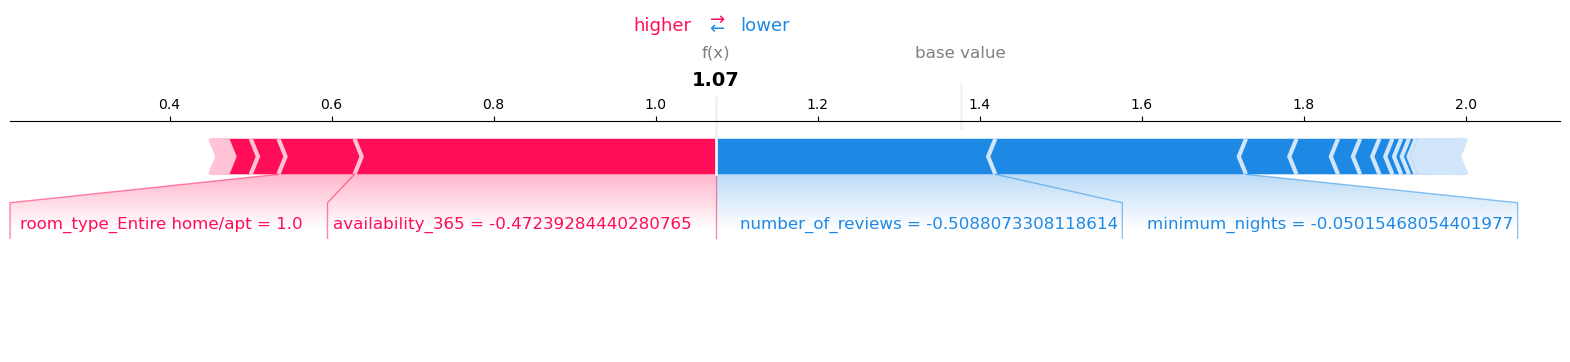

In [29]:
shap.force_plot(lgbm_explainer.expected_value, test_lgbm_shap_values[0], X_test_enc_df.iloc[0,:], matplotlib=True)

Looking at the first example, we can see that the scaled `minimum_nights` value being -0.29 and the scaled `number_of_reviews` value being -1.38 is pushing the predicted value for `reviews_per_month` higher, while the scaled `availability_365` value being -0.89 is pushing the predicted value lower. In particular, we can see that `number_of_reviews` is very big factor in driving the predicted target value higher.

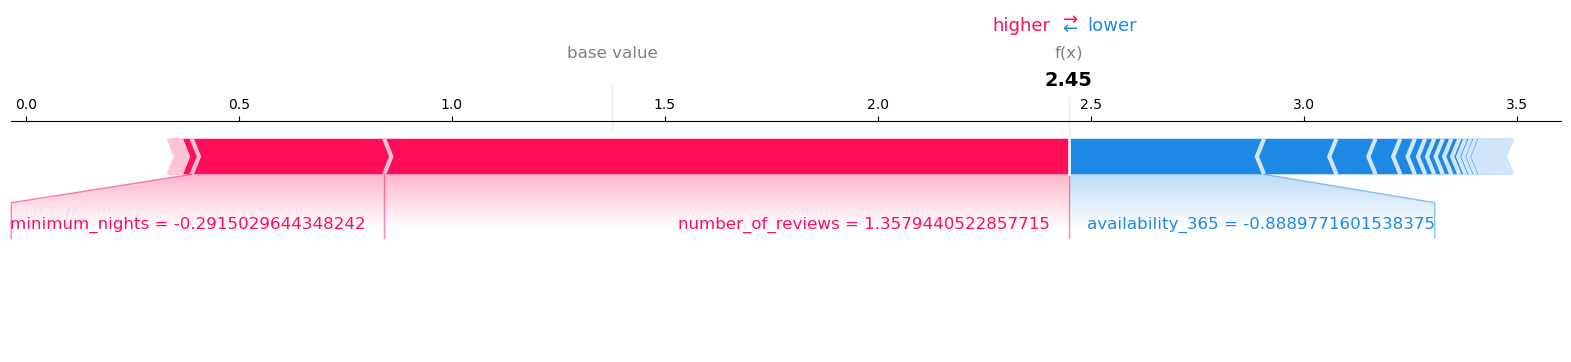

In [30]:
shap.force_plot(lgbm_explainer.expected_value, test_lgbm_shap_values[-1], X_test_enc_df.iloc[-1,:], matplotlib=True)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 13. Summary of results <a name="13"></a>
rubric={reasoning}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook.
    
</div>

_Points:_ 8

Overall, our final test score using the metric $R^2$ was not very high, with $R^2$ being around 0.55. From the plot comparing the true values for reviews per month to our predicted values, we can see that there are many values that are far off from the true value. In particular, there appears to be many cases where the predicted values is much smaller than the true value, as we can see that there are even some predicted values for reviews per month in the negative region which does not make sense.  
Although the results here are poor, we may be able to improve the performance if given more time and resources. Since the dataset had almost 40,000 examples, we had to choose a smaller training set size (40% train, 60% test) so that our machines could train the model in a reasonable amount of time. Furthermore, we had to drop the feature `name` which was the description of the Airbnb listing (for the same reason that our machines could not handle too many features with a large training set), which could have carried some important information such as containing certain words that make a listing more appealing than others. By increasing the training set size and including the listing description feature and transforming it using CountVectorizer, we could have improved our $R^2$ score.

In [31]:
results_summary = {
    "Model used": ["LGBM"],
    "R^2 score on test set": [final_score]
}
pd.DataFrame(results_summary)

,Model used,R^2 score on test set
0,LGBM,0.548446


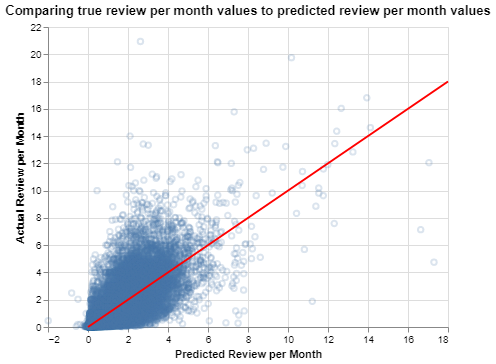

In [32]:
predictions = random_search_lgbm.predict(X_test)
pred_vs_actual_df = pd.DataFrame({
    "prediction": predictions,
    "actual": y_test
})
line_df = pd.DataFrame({
    "x_range": [0, 18],
    "y_range": [0, 18]
})
pred_vs_actual_plot = alt.Chart(
    pred_vs_actual_df,
    title = "Comparing true review per month values to predicted review per month values"
).mark_point(opacity=0.2).encode(
    x = alt.X("prediction", title="Predicted Review per Month"),
    y = alt.Y("actual", title="Actual Review per Month")
)
line = alt.Chart(line_df).mark_line(color="red").encode(
    x = "x_range",
    y = "y_range"
)
pred_vs_actual_plot + line

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 14. Creating a data analysis pipeline (Challenging)
rubric={reasoning}

**Your tasks:**
- In 522 you learned how build a reproducible data analysis pipeline. Convert this notebook into scripts and create a reproducible data analysis pipeline with appropriate documentation. Submit your project folder in addition to this notebook on GitHub and briefly comment on your organization in the text box below.
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 15. Your takeaway from the course (Challenging)
rubric={reasoning}

**Your tasks:**

What is your biggest takeaway from this course? 
    
</div>

_Points:_ 0.25

For feature engineering, we try to find the efficient solution and useful representation to help us with prediction. It is hard to make the decision. In general, we can ask domain experts, look at the research paper and so on. Most important is that we can do deep learning method when we have large data set. Additionally, feature selection is also an important step, it helps us to simplify our model. If two models have similar preference, the simple model is preferring to complex model. For example, cross-validated recursive feature elimination help to reduce features that are not important.

<!-- END QUESTION -->

<div class="alert alert-danger" style="color:black">
    
**Restart, run all and export a PDF before submitting**
    
Before submitting,
don't forget to run all cells in your notebook
to make sure there are no errors
and so that the TAs can see your plots on Gradescope.
You can do this by clicking the ▶▶ button
or going to `Kernel -> Restart Kernel and Run All Cells...` in the menu.
This is not only important for MDS,
but a good habit you should get into before ever committing a notebook to GitHub,
so that your collaborators can run it from top to bottom
without issues.
    
After running all the cells,
export a PDF of the notebook (preferably the WebPDF export)
and upload this PDF together with the ipynb file to Gradescope
(you can select two files when uploading to Gradescope)
</div>

---

## Help us improve the labs

The MDS program is continually looking to improve our courses, including lab questions and content. The following optional questions will not affect your grade in any way nor will they be used for anything other than program improvement:

1. Approximately how many hours did you spend working or thinking about this assignment (including lab time)?

#Ans:

2. Do you have any feedback on the lab you be willing to share? For example, any part or question that you particularly liked or disliked?

#Ans: